# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction


### Dataset Description 

> **Tip**: This soccer database comes from Kaggle and it contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

> - Tables :

       1. Country             : List of countries 
       2. League              : Names of leagues in each country 
       3. Match               : Record of each match between teams from 2008 to 2016 accross the leagues
       4. Player              : Details of each player accross the leagues
       5. Player attribbutes  : Attributes of each player accross the leagues
       6. Team                : Details of each team accross the leagues
       7. Team attributes     : Attributes of each team accross the leagues

      Primary keys : league_id, team_api_id & player_api_id helps to connect the teables to one another.



### Question(s) for Analysis

<ul>
<li><a href="#qstn1">Which league has the highest goals from the last 8 seasons</a></li>
<li><a href="#qstn2">which league has the highest goal per game ratio</a></li>
<li><a href="#qstn3">which teams contributed the most in the league with the highest goals.</a></li>
<li><a href="#qstn4">What attributes do they possess to enable them reach such status.</a></li>
</ul>

In [4]:
# Import statements for all packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Code to enable pandas to view more columns in a daaframe than ususal 
pd.set_option('display.max_columns',200)

In [5]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Ajiboro Ibrahim\\AppData\\Local\\Temp\\pip-install-406jktok\\pandas_a84cea7c9655487fa3daa2136334aa79\\setup.py'"'"'; __file__='"'"'C:\\Users\\Ajiboro Ibrahim\\AppData\\Local\\Temp\\pip-install-406jktok\\pandas_a84cea7c9655487fa3daa2136334aa79\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Ajiboro Ibrahim\AppData\Local\Temp\pip-wheel-zksp7p8d'
       cwd: C:\Users\Ajiboro Ibrahim\AppData\Local\Temp\pip-install-406jktok\pandas_a84cea7c9655487fa3daa2136334aa79\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py ->

<a id='wrangling'></a>
## Data Wrangling
<ul>
<li><a href="#sec1a">Familiarize with all dfs and identify their links</a></li>
<li><a href="#sec1b">Show general info for all dataframes</a></li>
<li><a href="#sec1c">Select preferred features in specific df(s)</a></li>
<li><a href="#sec1d">Check for null values</a></li>
<li><a href="#sec1e">Check for duplicates</a></li>
<li><a href="#sec1f">Check for wrong datatype and update</a></li>
</ul>

In [6]:
# Load datasets 
df_c = pd.read_csv('Country.csv')
df_l = pd.read_csv('League.csv')
df_m = pd.read_csv('Match.csv')
df_p = pd.read_csv('Player.csv')
df_pa = pd.read_csv('Player_Attributes.csv')
df_sq = pd.read_csv('sqlite_sequence.csv')
df_t = pd.read_csv('Team.csv')
df_ta = pd.read_csv('Team_Attributes.csv')

<a id='sec1a'></a>
### Familiarize with all dfs and identify their links 

In [7]:
df_c.head(2)

,id,name
0,1,Belgium
1,1729,England


In [8]:
df_l.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [9]:
df_m.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.3,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.2,3.6,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.3,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [10]:
df_p.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [11]:
df_pa.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [12]:
df_sq.head(2)

,name,seq
0,Team,103916
1,Country,51958


In [13]:
df_t.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [14]:
df_ta.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


<a id='sec1b'></a>
### Show general info of all dataframes 

In [15]:
print('=====================country df=====================')
df_c.info()
print('=====================leagues df=====================')
df_l.info()
print('=====================matches df=====================')
df_m.info()
print('=====================players df=====================')
df_p.info()
print('=====================player attributes df===========')
df_pa.info()
print('=====================teams df=======================')
df_t.info()
print('=====================team attributes df=============')
df_ta.info()

=====================country df=====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes
=====================leagues df=====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
=====================matches df=====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
==========

<a id='sec1c'></a>
### Select preferred features in specific df(s)

In [16]:
# select preferred features for matches 
df_m = df_m[['id','country_id','league_id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal'
,'away_team_goal']]

# select preferred features for player attributes
df_pa = df_pa[['id'
,'player_fifa_api_id','player_api_id','date','overall_rating','potential','preferred_foot','attacking_work_rate','defensive_work_rate','finishing','short_passing','curve','long_passing','reactions','balance','shot_power','stamina','strength','interceptions','positioning','vision','marking']]

# select preferred features for team attributes
df_ta = df_ta[['id','team_fifa_api_id','team_api_id','date','buildUpPlaySpeedClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']]


In [17]:
# Check matches df to confirm selected features above 
print('matches df :', df_m.shape)

matches df : (25979, 11)


In [18]:
# Check player attributes df to confirm selected features above 
print('player attributes df :', df_pa.shape)

player attributes df : (183978, 22)


In [19]:
# Check team attributes df to confirm selected features above 
print('team attributes df :', df_ta.shape)

team attributes df : (1458, 15)


<a id='sec1d'></a>
### Check for null values 

In [20]:
# get null values for each df 
display('country df',df_c.isnull().sum(), 
        'leagues df',df_l.isnull().sum(),
        'matches df',df_m.isnull().sum(),
        'players df',df_p.isnull().sum(),
        'player attributes df',df_pa.isnull().sum(),
        'teams df',df_t.isnull().sum(),
        'team attributes df',df_ta.isnull().sum()
       )

'country df'

id      0
name    0
dtype: int64

'leagues df'

id            0
country_id    0
name          0
dtype: int64

'matches df'

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

'players df'

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

'player attributes df'

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
finishing               836
short_passing           836
curve                  2713
long_passing            836
reactions               836
balance                2713
shot_power              836
stamina                 836
strength                836
interceptions           836
positioning             836
vision                 2713
marking                 836
dtype: int64

'teams df'

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

'team attributes df'

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeedClass             0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassingClass        0
chanceCreationCrossingClass       0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressureClass              0
defenceAggressionClass            0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [21]:
# remove null values for teams dataframe
df_t = df_t.dropna()
df_t.isnull().sum()

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64

In [22]:
# remove null values for player attributes dataframe
df_pa = df_pa.dropna()
df_pa.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
finishing              0
short_passing          0
curve                  0
long_passing           0
reactions              0
balance                0
shot_power             0
stamina                0
strength               0
interceptions          0
positioning            0
vision                 0
marking                0
dtype: int64

<a id='sec1e'></a>
### check for duplicates in each df

In [23]:
# get duplicates for each df 
display('country df',df_c.duplicated().sum(), 
        'leagues df',df_l.duplicated().sum(),
        'matches df',df_m.duplicated().sum(),
        'players df',df_p.duplicated().sum(),
        'player attributes df',df_pa.duplicated().sum(),
        'teams df',df_t.duplicated().sum(),
        'team attributes df',df_ta.duplicated().sum()
       )

'country df'

0

'leagues df'

0

'matches df'

0

'players df'

0

'player attributes df'

0

'teams df'

0

'team attributes df'

0

<a id='sec1f'></a>
### Check for wrong datatype and update ( only matches df has datatype issue),  gotten from genral info above.

In [24]:
#convert matches date column datatype to datetime 
df_m['date'] = pd.to_datetime(df_m['date'])
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   country_id        25979 non-null  int64         
 2   league_id         25979 non-null  int64         
 3   season            25979 non-null  object        
 4   stage             25979 non-null  int64         
 5   date              25979 non-null  datetime64[ns]
 6   match_api_id      25979 non-null  int64         
 7   home_team_api_id  25979 non-null  int64         
 8   away_team_api_id  25979 non-null  int64         
 9   home_team_goal    25979 non-null  int64         
 10  away_team_goal    25979 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 2.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#qstn1">Which league has the highest goals from the last 8 seasons</a></li>
<li><a href="#qstn2">which league has the highest goal per game ratio</a></li>
<li><a href="#qstn3">which teams contributed the most in the league with the highest goals.</a></li>
<li><a href="#qstn4">What attributes do they possess to enable them reach such status.</a></li>
</ul>

<a id='qstn1'></a>
### Research Question 1 (Which League has the highest goals!)

In [25]:
# matches dataframe is the best dataset to manipulet to solve the question above
df_m.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0


In [26]:
# calculate for total goals column
df_m['total_gaols'] =  df_m['home_team_goal'] + df_m['away_team_goal'] 

In [27]:
# groupby 'league id' to get total goals per league 
total_goals = df_m.groupby('league_id', as_index=False)['total_gaols'].sum()
total_goals

,league_id,total_gaols
0,1,4841
1,1729,8240
2,4769,7427
3,7809,7103
4,10257,7895
5,13274,7542
6,15722,4656
7,17642,5201
8,19694,4804
9,21518,8412


In [28]:
# sort values in decsending order 
total_goals.sort_values(by = 'total_gaols', ascending = False)

,league_id,total_gaols
9,21518,8412
1,1729,8240
4,10257,7895
5,13274,7542
2,4769,7427
3,7809,7103
7,17642,5201
0,1,4841
8,19694,4804
6,15722,4656


In [29]:
# to get team name, merge league dataframe with total_goals variable 
df_l.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [30]:
# to get team name, merge league dataframe with total_goals variable  
get_team_name = total_goals.merge(df_l, left_on='league_id', right_on='id', how='inner')
get_team_name

,league_id,total_gaols,id,country_id,name
0,1,4841,1,1,Belgium Jupiler League
1,1729,8240,1729,1729,England Premier League
2,4769,7427,4769,4769,France Ligue 1
3,7809,7103,7809,7809,Germany 1. Bundesliga
4,10257,7895,10257,10257,Italy Serie A
5,13274,7542,13274,13274,Netherlands Eredivisie
6,15722,4656,15722,15722,Poland Ekstraklasa
7,17642,5201,17642,17642,Portugal Liga ZON Sagres
8,19694,4804,19694,19694,Scotland Premier League
9,21518,8412,21518,21518,Spain LIGA BBVA


In [31]:
# sort values in descending order 
get_team_name = get_team_name.sort_values(by = 'total_gaols', ascending = False)
get_team_name

,league_id,total_gaols,id,country_id,name
9,21518,8412,21518,21518,Spain LIGA BBVA
1,1729,8240,1729,1729,England Premier League
4,10257,7895,10257,10257,Italy Serie A
5,13274,7542,13274,13274,Netherlands Eredivisie
2,4769,7427,4769,4769,France Ligue 1
3,7809,7103,7809,7809,Germany 1. Bundesliga
7,17642,5201,17642,17642,Portugal Liga ZON Sagres
0,1,4841,1,1,Belgium Jupiler League
8,19694,4804,19694,19694,Scotland Premier League
6,15722,4656,15722,15722,Poland Ekstraklasa


In [32]:
# rearrange varaiable feature before plotting 
get_team_name = get_team_name[['league_id','name','total_gaols']]
get_team_name

,league_id,name,total_gaols
9,21518,Spain LIGA BBVA,8412
1,1729,England Premier League,8240
4,10257,Italy Serie A,7895
5,13274,Netherlands Eredivisie,7542
2,4769,France Ligue 1,7427
3,7809,Germany 1. Bundesliga,7103
7,17642,Portugal Liga ZON Sagres,5201
0,1,Belgium Jupiler League,4841
8,19694,Scotland Premier League,4804
6,15722,Poland Ekstraklasa,4656


In [33]:
# get x & y axis values before plotting
get_team_name_x = get_team_name['name']
get_team_name_y = get_team_name['total_gaols']

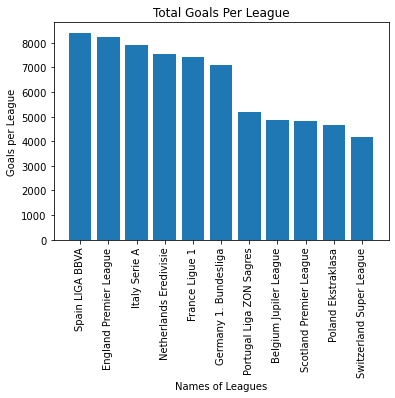

In [34]:
# plot the result
plt.bar(get_team_name_x, get_team_name_y)
plt.xticks(rotation='vertical')
plt.title('Total Goals Per League')
plt.xlabel('Names of Leagues')
plt.ylabel('Goals per League');

<a id='qstn2'></a>
### Research Question 2  (Which League has the highest goals per match ratio!)

In [35]:
# view total_goals variable from above
total_goals.head(2)

,league_id,total_gaols
0,1,4841
1,1729,8240


In [36]:
# use groupby function to get total matches per league from 'matches' dataframe
total_matches = df_m.groupby('league_id', as_index=False)['date'].count()
total_matches

,league_id,date
0,1,1728
1,1729,3040
2,4769,3040
3,7809,2448
4,10257,3017
5,13274,2448
6,15722,1920
7,17642,2052
8,19694,1824
9,21518,3040


In [37]:
# merge both total goals & total matches variables to get goals per match ratio
mrg_tg_tm = total_matches.merge(total_goals, left_on='league_id', right_on='league_id', how='inner')
mrg_tg_tm

,league_id,date,total_gaols
0,1,1728,4841
1,1729,3040,8240
2,4769,3040,7427
3,7809,2448,7103
4,10257,3017,7895
5,13274,2448,7542
6,15722,1920,4656
7,17642,2052,5201
8,19694,1824,4804
9,21518,3040,8412


In [38]:
# to get team name, merge league dataframe with total_goals variable 
get_team_name2 = mrg_tg_tm.merge(df_l, left_on='league_id', right_on='id', how='inner')
get_team_name2

,league_id,date,total_gaols,id,country_id,name
0,1,1728,4841,1,1,Belgium Jupiler League
1,1729,3040,8240,1729,1729,England Premier League
2,4769,3040,7427,4769,4769,France Ligue 1
3,7809,2448,7103,7809,7809,Germany 1. Bundesliga
4,10257,3017,7895,10257,10257,Italy Serie A
5,13274,2448,7542,13274,13274,Netherlands Eredivisie
6,15722,1920,4656,15722,15722,Poland Ekstraklasa
7,17642,2052,5201,17642,17642,Portugal Liga ZON Sagres
8,19694,1824,4804,19694,19694,Scotland Premier League
9,21518,3040,8412,21518,21518,Spain LIGA BBVA


In [39]:
# rename date column name to matches
get_team_name2.rename(columns = {'date':'matches'}, inplace = True)
get_team_name2

,league_id,matches,total_gaols,id,country_id,name
0,1,1728,4841,1,1,Belgium Jupiler League
1,1729,3040,8240,1729,1729,England Premier League
2,4769,3040,7427,4769,4769,France Ligue 1
3,7809,2448,7103,7809,7809,Germany 1. Bundesliga
4,10257,3017,7895,10257,10257,Italy Serie A
5,13274,2448,7542,13274,13274,Netherlands Eredivisie
6,15722,1920,4656,15722,15722,Poland Ekstraklasa
7,17642,2052,5201,17642,17642,Portugal Liga ZON Sagres
8,19694,1824,4804,19694,19694,Scotland Premier League
9,21518,3040,8412,21518,21518,Spain LIGA BBVA


In [40]:
# rearrange dataframe features 
get_team_name2 = get_team_name2[['league_id','name','matches','total_gaols']]
get_team_name2

,league_id,name,matches,total_gaols
0,1,Belgium Jupiler League,1728,4841
1,1729,England Premier League,3040,8240
2,4769,France Ligue 1,3040,7427
3,7809,Germany 1. Bundesliga,2448,7103
4,10257,Italy Serie A,3017,7895
5,13274,Netherlands Eredivisie,2448,7542
6,15722,Poland Ekstraklasa,1920,4656
7,17642,Portugal Liga ZON Sagres,2052,5201
8,19694,Scotland Premier League,1824,4804
9,21518,Spain LIGA BBVA,3040,8412


In [41]:
# create goals per match ratio for each league
get_team_name2['gpm_ratio'] =  get_team_name2['total_gaols'] / get_team_name2['matches'] 
get_team_name2

<ipython-input-41-08b06c1f1102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_team_name2['gpm_ratio'] =  get_team_name2['total_gaols'] / get_team_name2['matches']


,league_id,name,matches,total_gaols,gpm_ratio
0,1,Belgium Jupiler League,1728,4841,2.801505
1,1729,England Premier League,3040,8240,2.710526
2,4769,France Ligue 1,3040,7427,2.443092
3,7809,Germany 1. Bundesliga,2448,7103,2.901552
4,10257,Italy Serie A,3017,7895,2.616838
5,13274,Netherlands Eredivisie,2448,7542,3.080882
6,15722,Poland Ekstraklasa,1920,4656,2.425000
7,17642,Portugal Liga ZON Sagres,2052,5201,2.534600
8,19694,Scotland Premier League,1824,4804,2.633772
9,21518,Spain LIGA BBVA,3040,8412,2.767105


In [42]:
# sort values in descending order before plotting
get_team_name2 = get_team_name2.sort_values(by = 'gpm_ratio', ascending = False)
get_team_name2.head(4)

,league_id,name,matches,total_gaols,gpm_ratio
5,13274,Netherlands Eredivisie,2448,7542,3.080882
10,24558,Switzerland Super League,1422,4166,2.929677
3,7809,Germany 1. Bundesliga,2448,7103,2.901552
0,1,Belgium Jupiler League,1728,4841,2.801505


In [45]:
# get x & y axis values before plotting
get_team_name2_x = get_team_name2['name']
get_team_name2_y = get_team_name2['gpm_ratio']

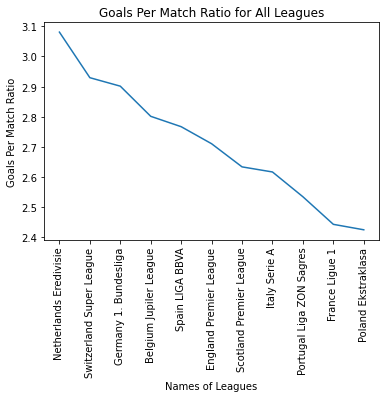

In [46]:
# plot the result
plt.plot(get_team_name2_x, get_team_name2_y)
plt.xticks(rotation='vertical')
plt.title('Goals Per Match Ratio for All Leagues')
plt.xlabel('Names of Leagues')
plt.ylabel('Goals Per Match Ratio');

<a id='qstn3'></a>
### Research Question 3  (Which teams are the highest contributors of the league with the highest goals? )

In [47]:
# get league_id of league with highest goal from previous code above 
get_team_name.head(2)

,league_id,name,total_gaols
9,21518,Spain LIGA BBVA,8412
1,1729,England Premier League,8240


In [48]:
# get matches per season in Spain from matches df (df_m)
df_m_spa = df_m.query('league_id == 21518')
df_m_spa.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_gaols
21517,21518,21518,21518,2008/2009,1,2008-08-30,530023,10267,8661,3,0,3
21518,21519,21518,21518,2008/2009,1,2008-08-31,530084,8371,10205,1,1,2


In [49]:
# get home team api_id & goals scored by home teams from df above
df_m_spa_hme = df_m_spa[['home_team_api_id','home_team_goal']]
df_m_spa_hme.head(2)

,home_team_api_id,home_team_goal
21517,10267,3
21518,8371,1


In [50]:
# get away team api_id & goals scored by away teams 
df_m_spa_awy = df_m_spa[['away_team_api_id','away_team_goal']]
df_m_spa_awy.head(2)

,away_team_api_id,away_team_goal
21517,8661,0
21518,10205,1


In [51]:
# sort home team matches and goals by home_team_api_id
df_m_spa_hme.sort_values(by = 'home_team_api_id', ascending = False).head(3)

,home_team_api_id,home_team_goal
22061,10281,1
23159,10281,2
21633,10281,2


In [52]:
# group dataframe above by home_team_api_id to get total home goals per team 
df_m_spa_hmeg = df_m_spa_hme.groupby('home_team_api_id', as_index=False)['home_team_goal'].sum()
df_m_spa_hmeg.head(5)

,home_team_api_id,home_team_goal
0,7869,12
1,7878,100
2,8302,285
3,8305,202
4,8306,25


In [53]:
# sort away team games and goals per team using 'away_team_api_id'
df_m_spa_awy.sort_values(by = 'away_team_api_id', ascending = False).head(3)

,away_team_api_id,away_team_goal
23332,10281,1
23582,10281,0
23398,10281,1


In [54]:
# get sum of total away goals per team using groupby
df_m_spa_awyg = df_m_spa_awy.groupby('away_team_api_id', as_index=False)['away_team_goal'].sum()
df_m_spa_awyg.head(5)

,away_team_api_id,away_team_goal
0,7869,10
1,7878,79
2,8302,193
3,8305,143
4,8306,20


In [55]:
# merge both away matches dataframe and home matches dataframe to get total goals per team 
df_m_spa_tgls = df_m_spa_hmeg.merge(df_m_spa_awyg, left_on='home_team_api_id', right_on='away_team_api_id', how='inner')
df_m_spa_tgls.head(8)

,home_team_api_id,home_team_goal,away_team_api_id,away_team_goal
0,7869,12,7869,10
1,7878,100,7878,79
2,8302,285,8302,193
3,8305,202,8305,143
4,8306,25,8306,20
5,8315,250,8315,165
6,8370,139,8370,108
7,8371,137,8371,95


In [56]:
# calculate for total sum of goals ( away + home )
df_m_spa_tgls['total_goals'] =  df_m_spa_tgls['home_team_goal'] + df_m_spa_tgls['away_team_goal'] 
df_m_spa_tgls.head()

,home_team_api_id,home_team_goal,away_team_api_id,away_team_goal,total_goals
0,7869,12,7869,10,22
1,7878,100,7878,79,179
2,8302,285,8302,193,478
3,8305,202,8305,143,345
4,8306,25,8306,20,45


In [57]:
df_m_spa_tgls.head(3)

,home_team_api_id,home_team_goal,away_team_api_id,away_team_goal,total_goals
0,7869,12,7869,10,22
1,7878,100,7878,79,179
2,8302,285,8302,193,478


In [58]:
# drop column ( away_team_api_id )
df_m_spa_tgls.drop(['away_team_api_id'], axis=1, inplace = True)
df_m_spa_tgls.head(2)

,home_team_api_id,home_team_goal,away_team_goal,total_goals
0,7869,12,10,22
1,7878,100,79,179


In [59]:
# rename column ( home_team_api_id ) to ( team_api_id )
df_m_spa_tgls = df_m_spa_tgls.rename(columns = {'home_team_api_id' : 'team_api_id'})
df_m_spa_tgls.head(2)

,team_api_id,home_team_goal,away_team_goal,total_goals
0,7869,12,10,22
1,7878,100,79,179


In [60]:
# check 'team' dataframe defore merging to get team names 
df_t.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [61]:
# merge dataframes above to get names of teams 
df_m_spa_tgls_nme = df_m_spa_tgls.merge(df_t, left_on='team_api_id', right_on='team_api_id', how='inner')
df_m_spa_tgls_nme.head(3)

,team_api_id,home_team_goal,away_team_goal,total_goals,id,team_fifa_api_id,team_long_name,team_short_name
0,7869,12,10,22,47612,1867.0,Córdoba CF,COR
1,7878,100,79,179,45330,110832.0,Granada CF,GRA
2,8302,285,193,478,43044,481.0,Sevilla FC,SEV


In [62]:
# select prefrred columns to use for plotting and sort them in descending order for the first 10 teams
df_m_spa_tgls_name = df_m_spa_tgls_nme[['team_api_id','team_long_name','total_goals']]
total_team_goals = df_m_spa_tgls_name.sort_values(by = 'total_goals', ascending = False).head(10)

In [63]:
# check to confirm selection above 
total_team_goals

,team_api_id,team_long_name,total_goals
17,8634,FC Barcelona,849
16,8633,Real Madrid CF,843
26,9906,Atlético Madrid,524
29,10267,Valencia CF,484
2,8302,Sevilla FC,478
5,8315,Athletic Club de Bilbao,415
21,9864,Málaga CF,377
28,10205,Villarreal CF,364
3,8305,Getafe CF,345
12,8558,RCD Espanyol,338


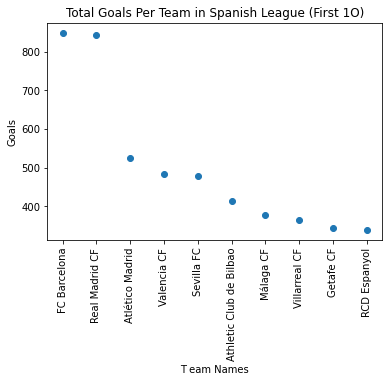

In [64]:
# get x & y axis values before plotting
total_team_goals_x = total_team_goals['total_goals']
total_team_goals_y = total_team_goals['team_long_name']


# plot the result
plt.scatter(total_team_goals_y, total_team_goals_x)
plt.xticks(rotation='vertical')
plt.title('Total Goals Per Team in Spanish League (First 1O)')
plt.xlabel('T eam Names')
plt.ylabel('Goals');

<a id='qstn4'></a>
### Research Question 4  (Which attributtes should a team posses to increase their chances to score goals? )

> **Attributes**

1. buildUpPlaySpeedClass
2. buildUpPlayPassingClass
3. buildUpPlayPositioningClass
4. chanceCreationPassingClass
5. chanceCreationCrossingClass
6. chanceCreationShootingClass
7. chanceCreationPositioningClass
8. defencePressureClass
9. defenceAggressionClass
10. defenceTeamWidthClass
11. defenceDefenderLineClass

In [65]:
# check team attributes df
df_ta.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,Balanced,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,Balanced,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover


In [66]:
# check team attributes general info
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeedClass           1458 non-null   object
 5   buildUpPlayPassingClass         1458 non-null   object
 6   buildUpPlayPositioningClass     1458 non-null   object
 7   chanceCreationPassingClass      1458 non-null   object
 8   chanceCreationCrossingClass     1458 non-null   object
 9   chanceCreationShootingClass     1458 non-null   object
 10  chanceCreationPositioningClass  1458 non-null   object
 11  defencePressureClass            1458 non-null   object
 12  defenceAggressionClass          1458 non-null   

In [67]:
# Get best five teams from spain to access their attributes ( from the total gaols df in previous code)
teams_5 = [8634 , 8633 , 9906 , 10267 , 8302]
teams_5a = df_ta.loc[df_ta['team_api_id'].isin(teams_5)]
teams_5a.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
94,95,240,9906,2010-02-22 00:00:00,Balanced,Short,Free Form,Normal,Normal,Lots,Free Form,High,Press,Normal,Offside Trap
95,96,240,9906,2011-02-22 00:00:00,Balanced,Mixed,Organised,Normal,Lots,Lots,Organised,Medium,Press,Normal,Cover


In [80]:
def barmode(attributes_df, teams_df, attribute):
    attributes_df = teams_df[attribute].value_counts()
    return attributes_df.plot(kind = 'barh', xlabel='Attributes', title='Mode of ' + attribute);

<AxesSubplot:title={'center':'Mode of buildUpPlaySpeedClass'}, ylabel='Attributes'>

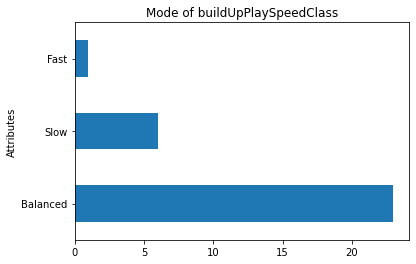

In [81]:
attribute = 'buildUpPlaySpeedClass'
barmode(attributes_p1, teams_5a, attribute)

In [68]:
# get modal value of attributes per attribute class
attributes_p1 = teams_5a['buildUpPlaySpeedClass'].value_counts()
attributes_p1

Balanced    23
Slow         6
Fast         1
Name: buildUpPlaySpeedClass, dtype: int64

<AxesSubplot:>

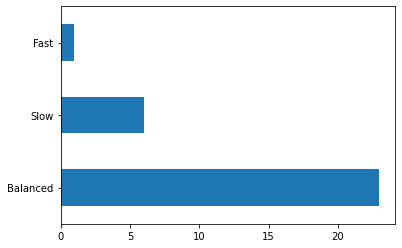

In [69]:
# plot modal value of attributes per attribute class
attributes_p1.plot(kind = 'barh')

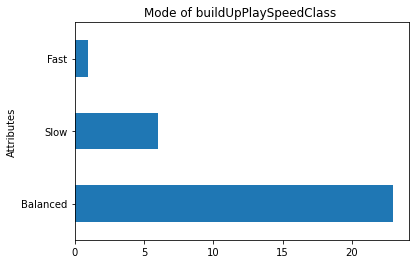

In [75]:
attributes_p1.plot(kind = 'barh', xlabel='Attributes', ylabel='Y Label', title='Mode of buildUpPlaySpeedClass');
#df.plot(xlabel='X Label', ylabel='Y Label', title='Plot Title')

<AxesSubplot:>

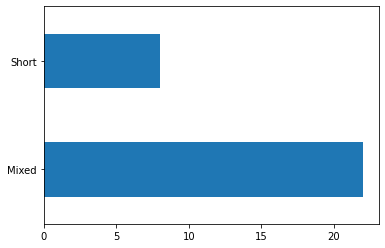

In [74]:
# get modal value of attributes per attribute class
attributes_p2 = teams_5a['buildUpPlayPassingClass'].value_counts()
attributes_p2.plot(kind = 'barh')

<AxesSubplot:>

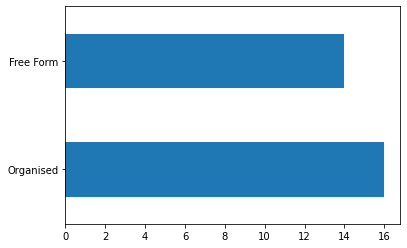

In [149]:
# get modal value of attributes per attribute class
attributes_p3 = teams_5a['buildUpPlayPositioningClass'].value_counts()
attributes_p3.plot(kind = 'barh')

<AxesSubplot:>

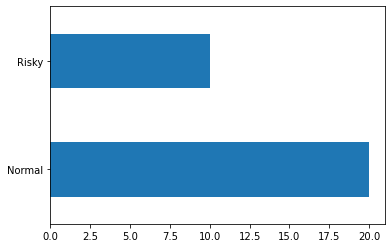

In [151]:
# get modal value of attributes per attribute class
attributes_p4 = teams_5a['chanceCreationPassingClass'].value_counts()
attributes_p4.plot(kind = 'barh')

<AxesSubplot:>

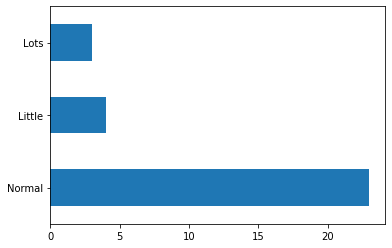

In [153]:
# get modal value of attributes per attribute class
attributes_p5 = teams_5a['chanceCreationCrossingClass'].value_counts()
attributes_p5.plot(kind = 'barh')

<AxesSubplot:>

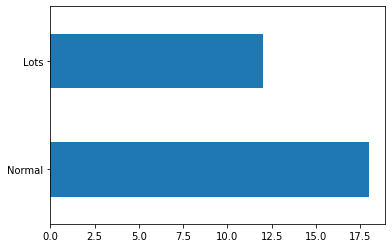

In [154]:
# get modal value of attributes per attribute class
attributes_p6 = teams_5a['chanceCreationShootingClass'].value_counts()
attributes_p6.plot(kind = 'barh')

<AxesSubplot:>

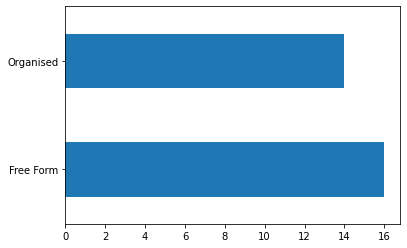

In [155]:
# get modal value of attributes per attribute class
attributes_p7 = teams_5a['chanceCreationPositioningClass'].value_counts()
attributes_p7.plot(kind = 'barh')

<AxesSubplot:>

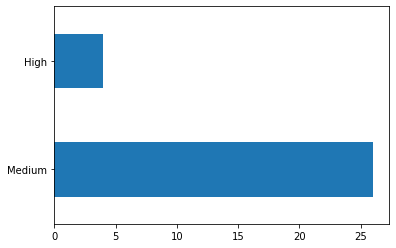

In [156]:
# get modal value of attributes per attribute class
attributes_p8 = teams_5a['defencePressureClass'].value_counts()
attributes_p8.plot(kind = 'barh')

<AxesSubplot:>

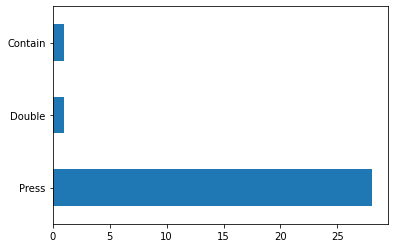

In [157]:
# get modal value of attributes per attribute class
attributes_p9 = teams_5a['defenceAggressionClass'].value_counts()
attributes_p9.plot(kind = 'barh')

<AxesSubplot:>

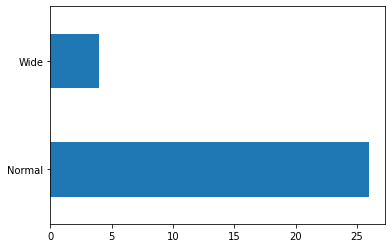

In [158]:
# get modal value of attributes per attribute class
attributes_p10 = teams_5a['defenceTeamWidthClass'].value_counts()
attributes_p10.plot(kind = 'barh')

<AxesSubplot:>

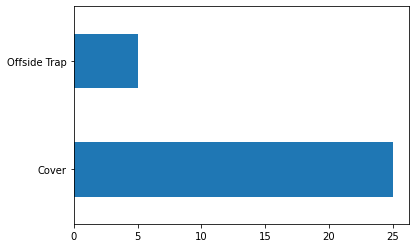

In [159]:
# get modal value of attributes per attribute class
attributes_p11 = teams_5a['defenceDefenderLineClass'].value_counts()
attributes_p11.plot(kind = 'barh')

In [49]:
# create dataframe for all modal values per attribute class plotted above 
df_attributes = pd.DataFrame({'attributes': ['buildUpPlaySpeedClass', 
                                   'buildUpPlayPassingClass', 
                                   'buildUpPlayPositioningClass',
                                   'chanceCreationPassingClass', 
                                   'chanceCreationCrossingClass', 
                                   'chanceCreationShootingClass', 
                                   'chanceCreationPositioningClass', 
                                   'defencePressureClass', 
                                   'defenceAggressionClass', 
                                   'defenceTeamWidthClass',
                                   'defenceDefenderLineClass'],
                          
                          'values': ['balanced', 'mixed', 'organised', 
                                     'normal', 'normal', 'normal', 
                                     'free form', 'medium', 'press', 
                                     'normal', 'cover']})

In [50]:
# check dataframe created above
df_attributes

,attributes,values
0,buildUpPlaySpeedClass,balanced
1,buildUpPlayPassingClass,mixed
2,buildUpPlayPositioningClass,organised
3,chanceCreationPassingClass,normal
4,chanceCreationCrossingClass,normal
5,chanceCreationShootingClass,normal
6,chanceCreationPositioningClass,free form
7,defencePressureClass,medium
8,defenceAggressionClass,press
9,defenceTeamWidthClass,normal


<a id='conclusions'></a>
## Conclusions

### Research Question 1 (Which League has the highest goals!)

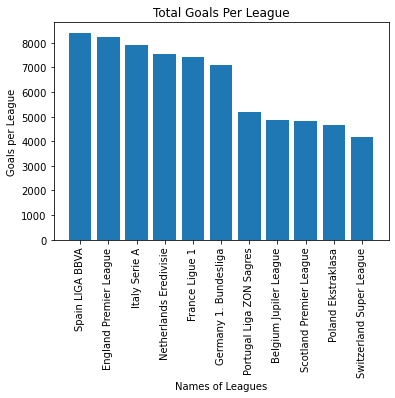

In [173]:
# plot the result
plt.bar(get_team_name_x, get_team_name_y)
plt.xticks(rotation='vertical')
plt.title('Total Goals Per League')
plt.xlabel('Names of Leagues')
plt.ylabel('Goals per League');

The league with the highest goals is Spain LIGA BBVA

### Research Question 2 (Which League has the highest goals per match ratio!)

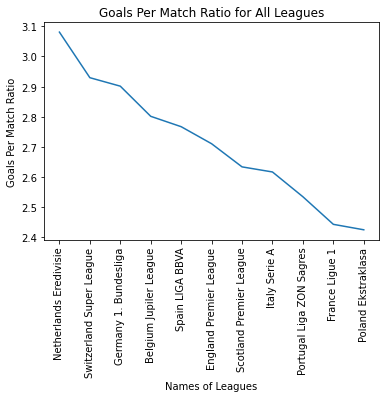

In [177]:
# plot the result
plt.plot(get_team_name2_x, get_team_name2_y)
plt.xticks(rotation='vertical')
plt.title('Goals Per Match Ratio for All Leagues')
plt.xlabel('Names of Leagues')
plt.ylabel('Goals Per Match Ratio');

The League that has the highest goals per match ratio is Netherlands Eredivisie

### Research Question 3 (Which teams are the highest contributors of the league with the highest goals? )

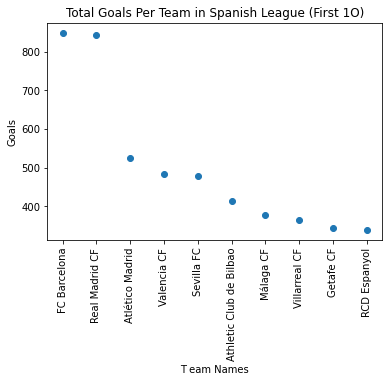

In [179]:
# plot the result
plt.scatter(total_team_goals_y, total_team_goals_x)
plt.xticks(rotation='vertical')
plt.title('Total Goals Per Team in Spanish League (First 1O)')
plt.xlabel('T eam Names')
plt.ylabel('Goals');

The team with the highest number of goals is FC Barcelona 

### Research Question 4 (Which attributtes should a team posses to increase their chances to score goals? )

In [171]:
df_attributes

,attributes,values
0,buildUpPlaySpeedClass,balanced
1,buildUpPlayPassingClass,mixed
2,buildUpPlayPositioningClass,organised
3,chanceCreationPassingClass,normal
4,chanceCreationCrossingClass,normal
5,chanceCreationShootingClass,normal
6,chanceCreationPositioningClass,free form
7,defencePressureClass,medium
8,defenceAggressionClass,press
9,defenceTeamWidthClass,normal


The attributes above are the best for optimal goal scoring opportunities.

### Limitation 

> - Though a lot of information were made available in the datasets loaded in this notebook. An issue i had was the missen link that will enable me connect the players to their respective teams. This prevented me from exploring the players in connection with their respective teams. Doing this will enable some indepth questions to be feasible. 